In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from datetime import timedelta
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

In [2]:
filepath = "H:/Projects/CryptoBot/btcusd_1-min_data.csv"
data = pd.read_csv(filepath)
data['Timestamp'] =pd.to_datetime(data['Timestamp'],unit = 's')
data = data.sort_values(by = "Timestamp")
data['Timestamp']= data['Timestamp'].fillna(data["Timestamp"].median())
data = data.dropna()


In [ ]:
fd = data[data['Timestamp'] >= data['Timestamp'].max() - timedelta(days=365*5)]
fd.head(-5)

,Timestamp,Open,High,Low,Close,Volume
4238279,2020-01-23 00:00:00,8648.12,8648.13,8646.00,8646.00,0.087581
4238280,2020-01-23 00:01:00,8646.00,8646.00,8643.69,8646.00,0.213066
4238281,2020-01-23 00:02:00,8644.19,8645.18,8644.19,8644.96,0.061995
4238282,2020-01-23 00:03:00,8641.44,8645.90,8641.44,8644.00,0.209631
4238283,2020-01-23 00:04:00,8641.44,8644.00,8641.44,8641.45,0.380582
...,...,...,...,...,...,...
6747270,2025-01-20 23:51:00,102130.00,102158.00,102026.00,102027.00,0.227927
6747271,2025-01-20 23:52:00,102017.00,102017.00,101798.00,101856.00,33.448872
6747272,2025-01-20 23:53:00,101914.00,101999.00,101914.00,101954.00,0.014578
6747273,2025-01-20 23:54:00,101962.00,101962.00,101769.00,101814.00,0.885198


In [33]:
data =fd

In [34]:
lag_features = ["Open","High","Low","Close","Volume"]
data["target"] = data["Close"].shift(-1)
data = data.dropna()



In [35]:
X = data[lag_features]
Y = data['target']

split_ratio = 0.8
split_index = int(len(data)*split_ratio)

X_train , X_test = X[:split_index],X[split_index:]
Y_train , Y_test = Y[:split_index],Y[split_index:]

print(f"Train Shape:{X_train.shape}")
print(f"Test Shape:{X_test.shape}")

Train Shape:(2007200, 5)
Test Shape:(501800, 5)


In [39]:
rf_model = RandomForestRegressor(
    n_estimators= 100, # num of trees
    max_depth= 10, # max depth of each tree
    random_state=42, # seed for reproducibility  
    n_jobs = -1 # use all cores
)
rf_model.fit(X_train,Y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)

print(f"mse : {mse}")
print(f"mae : {mae}")

mse : 60107430.620691136
mae : 2260.352252492888


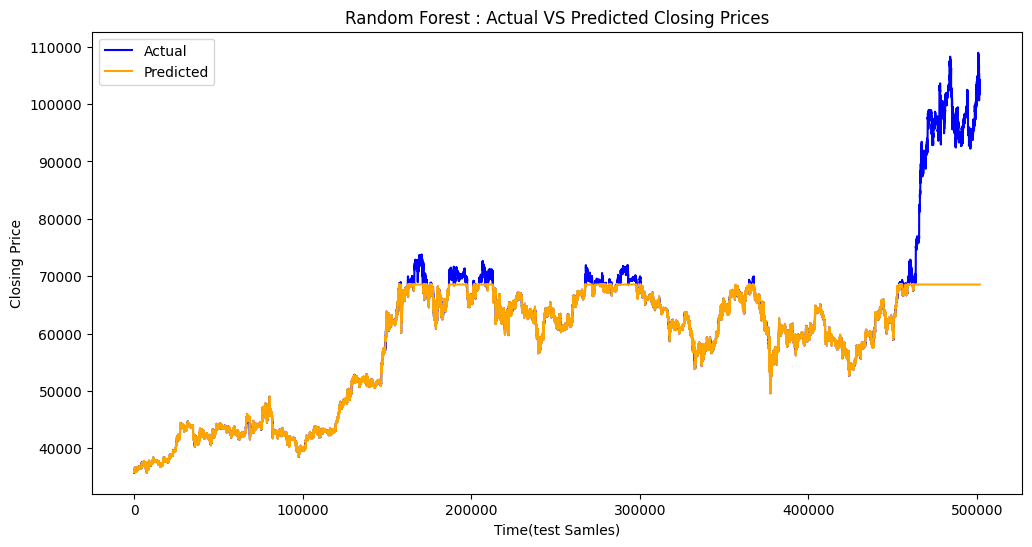

In [41]:
plt.figure(figsize=(12,6))
plt.plot(Y_test.reset_index(drop=True),label="Actual",color="blue")
plt.plot(y_pred,label='Predicted', color="orange")
plt.title("Random Forest : Actual VS Predicted Closing Prices")
plt.xlabel("Time(test Samles)")
plt.ylabel("Closing Price")
plt.legend()
plt.show()